In [1]:
!pip install networkx
!pip install pomegranate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 26.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pomegranate: filename=pomegranate-0.14.8-cp38-cp38-linux_x86_64.whl size=22140373 sha256=b6d3ee04eb0021f2b4fdef993b5bf6d170f74898495d4b723bd1274ff93b8827
  Stored in directory: /root/.cache/pip/wheels/e5/39/08/5dac86e6d7ef4c6b9f337b0913f1bf96a8b32ff45f833b067f
Successfully built pomegranate


In [2]:
import networkx as nx
from pomegranate import *
import matplotlib.pyplot as plt


# Etape 1 

Un simple poly arbre 

In [3]:
def create_tree(nodes, edges):
    graph = nx.DiGraph()
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    return graph


In [4]:
def plot_graph(G):
    options = {
        'node_color': '#5e2b73',
        'node_size': 4000,
        'width': 2,
        'font_size': 10,
        'font_color': 'black',
    }
    nx.draw(G, with_labels=True, **options)
    plt.show()


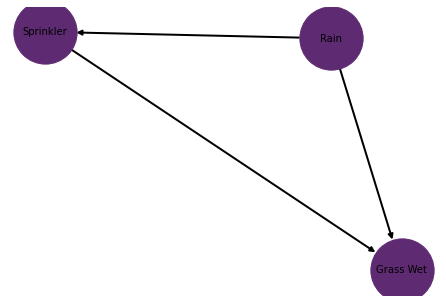

In [5]:
G = create_tree(nodes=["Rain", "Sprinkler", "Grass Wet"], edges=[
                        ("Rain", "Sprinkler"), ("Rain", "Grass Wet"), ("Sprinkler", "Grass Wet")])
plot_graph(G)


Calcule de l'inference

In [6]:
rain = DiscreteDistribution({'F': 0.8, 'T': 0.2})
sprinkler = ConditionalProbabilityTable(
    [['F', 'T', 0.4],
     ['F', 'F', 0.6],
     ['T', 'T', 0.01],
     ['T', 'F', 0.99]], [rain])

grass_wet = ConditionalProbabilityTable(
    [['F', 'F', 'F', 1.0],
    ['F', 'F', 'T', 0.0],
    ['F', 'T', 'F', 0.2],
    ['F', 'T', 'T', 0.8],
    ['T', 'F', 'F', 0.1],
    ['T', 'F', 'T', 0.9],
    ['T', 'T', 'F', 0.01],
    ['T', 'T', 'T', 0.99]], [sprinkler, rain])

rain_node = Node(rain, name="Rain")
sprinkler_node = Node(sprinkler, name="Sprinkler")
grass_node = Node(grass_wet, name="Grass Wet")
B_net = BayesianNetwork("water on grass")
B_net.add_states(rain_node, sprinkler_node, grass_node)
B_net.add_edge(sprinkler_node, grass_node)
B_net.add_edge(rain_node, sprinkler_node)
B_net.add_edge(rain_node, grass_node)
B_net.bake()


In [7]:
#l'ordre des entrées d'apres l'ordre d'affectation des noeuds dans le graphe ! 
B_net.predict_proba([['T', 'F', None]])

[array(['T', 'F', {
                      "class" : "Distribution",
                      "dtype" : "str",
                      "name" : "DiscreteDistribution",
                      "parameters" : [
                          {
                              "T" : 0.7999999999999999,
                              "F" : 0.20000000000000018
                          }
                      ],
                      "frozen" : false
                  }                                    ], dtype=object)]

#### Résultats

# Etape 3

Arbre de jonction

In [8]:
from read import read_bn
from bayesnet import BayesNet
from cliquetree import CliqueTree
import time
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: ignored

In [ ]:
bn = read_bn("pigs.bif")

In [ ]:
b_graph = create_tree(nodes=bn.nodes(), edges=bn.edges())
plot_graph(b_graph)

In [ ]:
G = get_poly_arbre(nodes=bn.nodes(), edges=bn.moralized_edges())
plot_graph(G)

In [ ]:
nodes = []
edges = []
t = []
graphs = ['cancer.bif', 'earthquake.bif', 'asia.bif', 'sachs.bif',
          'child.bif',  'win95pts.bif', 'pathfinder.bif', 'andes.bif', 'pigs.bif']
print('Network\t\t Nodes\t\t Edges\t\t Cliques\t Time (s)')
print('=========================================================================')
for filename in graphs:
    bn = read_bn(os.path.join('NetWorks', filename))
    start = time.time()
    cliques = CliqueTree(bn)
    end = time.time() - start
    edge = 0
    for l in list(bn.E.values()):
        edge += len(l)
    print(filename, '\t', len(bn.V), '\t\t', edge,
          '\t\t', len(cliques.C), '\t\t', str(end)[:8])
    nodes.append(len(bn.V))
    edges.append(edge)
    t.append(end)


In [ ]:
plt.plot(edges, t, "-o")
plt.title('Execution time vs number of edges')
plt.xlabel('Edges')
plt.ylabel('Execution time (s)')
plt.show()
